In [3]:
import pandas as pd
import numpy as np

In [4]:
train = pd.read_csv('../data/adult_train.csv')
test = pd.read_csv('../data/adult_test.csv')

In [5]:
X = train.drop('target', axis=1)
y = train['target']

In [6]:
X.head()

,age,workclass_cat,fnlwgt,education_cat,education-num,marital-status_cat,occupation_cat,relationship_cat,race_cat,sex_cat,capital-gain,capital-loss,hours-per-week,native-country_cat
0,39,6,77516,11,13,4,0,1,4,1,2174,0,40,38
1,50,5,83311,11,13,2,3,0,4,1,0,0,13,38
2,38,3,215646,8,9,0,5,1,4,1,0,0,40,38
3,53,3,234721,6,7,2,5,0,2,1,0,0,40,38
4,28,3,338409,11,13,2,9,5,2,0,0,0,40,4


In [7]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)

In [39]:
seed = 7
np.random.seed(seed)

# create model
model = Sequential()
model.add(Dense(14, input_dim=X_train.shape[1], init='random_uniform', activation='relu'))
model.add(Dense(9, init='random_uniform', activation='relu'))
model.add(Dense(7, init='random_uniform', activation='relu'))
model.add(Dense(3, init='random_uniform', activation='relu'))
model.add(Dense(1, init='uniform', activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

/Users/sanzhar/.virtualenvs/ml/lib/python3.6/site-packages/ipykernel/__main__.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(14, input_dim=14, activation="relu", kernel_initializer="random_uniform")`
/Users/sanzhar/.virtualenvs/ml/lib/python3.6/site-packages/ipykernel/__main__.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(9, activation="relu", kernel_initializer="random_uniform")`
/Users/sanzhar/.virtualenvs/ml/lib/python3.6/site-packages/ipykernel/__main__.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(7, activation="relu", kernel_initializer="random_uniform")`
/Users/sanzhar/.virtualenvs/ml/lib/python3.6/site-packages/ipykernel/__main__.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(3, activation="relu", kernel_initializer="random_uniform")`
/Users/sanzhar/.virtualenvs/ml/lib/python3.6/site-packages/ipykernel/__main__.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense

In [47]:
# Fit the model
model.fit(X_train.as_matrix(), y_train.as_matrix(), epochs=300, batch_size=7000, verbose=1)

Epoch 1/300
21815/21815 [==============================] - 0s - loss: 0.4465 - acc: 0.8079     
Epoch 2/300
21815/21815 [==============================] - 0s - loss: 0.4542 - acc: 0.8044     
Epoch 3/300
21815/21815 [==============================] - 0s - loss: 0.4655 - acc: 0.8029     
Epoch 4/300
21815/21815 [==============================] - 0s - loss: 0.4513 - acc: 0.8074     
Epoch 5/300
21815/21815 [==============================] - 0s - loss: 0.4492 - acc: 0.8080     
Epoch 6/300
21815/21815 [==============================] - 0s - loss: 0.4477 - acc: 0.8068     
Epoch 7/300
21815/21815 [==============================] - 0s - loss: 0.4598 - acc: 0.8040     
Epoch 8/300
21815/21815 [==============================] - 0s - loss: 0.4586 - acc: 0.8051     
Epoch 9/300
21815/21815 [==============================] - 0s - loss: 0.4565 - acc: 0.8037     
Epoch 10/300
21815/21815 [==============================] - 0s - loss: 0.4449 - acc: 0.8070     
Epoch 11/300
21815/21815 [=============

21815/21815 [==============================] - 0s - loss: 0.4378 - acc: 0.8083     
Epoch 169/300
21815/21815 [==============================] - 0s - loss: 0.4347 - acc: 0.8084     
Epoch 170/300
21815/21815 [==============================] - 0s - loss: 0.4348 - acc: 0.8075     
Epoch 171/300
21815/21815 [==============================] - 0s - loss: 0.4346 - acc: 0.8083     
Epoch 172/300
21815/21815 [==============================] - 0s - loss: 0.4333 - acc: 0.8087     
Epoch 173/300
21815/21815 [==============================] - 0s - loss: 0.4331 - acc: 0.8086     
Epoch 174/300
21815/21815 [==============================] - 0s - loss: 0.4326 - acc: 0.8088     
Epoch 175/300
21815/21815 [==============================] - 0s - loss: 0.4333 - acc: 0.8081     
Epoch 176/300
21815/21815 [==============================] - 0s - loss: 0.4329 - acc: 0.8083     
Epoch 177/300
21815/21815 [==============================] - 0s - loss: 0.4320 - acc: 0.8082     
Epoch 178/300
21815/21815 [=======

In [41]:
from sklearn.metrics import classification_report, accuracy_score

In [42]:
y_pred = model.predict_classes(X_test.as_matrix())

 9088/10746 [========================>.....] - ETA: 0s

In [43]:
print(classification_report(y_true=y_test, y_pred=y_pred))

             precision    recall  f1-score   support

          0       0.81      0.96      0.88      8158
          1       0.69      0.29      0.40      2588

avg / total       0.78      0.80      0.76     10746



In [44]:
accuracy_score(model.predict_classes(X_train.as_matrix()), y_train) # train accuracy

19616/21815 [=========================>....] - ETA: 0s

0.80224616089846434

In [45]:
accuracy_score(model.predict_classes(test.drop('target', axis=1).as_matrix()), test['target']) # test accuracy

15680/16281 [===========================>..] - ETA: 0s

0.80007370554634238

In [28]:
import xgboost as xgb

In [29]:
xgbClf = xgb.XGBClassifier(nthread=-1)

In [30]:
%%time
xgbClf.fit(X_train, y_train)

CPU times: user 1.17 s, sys: 79 ms, total: 1.25 s
Wall time: 521 ms


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=-1, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

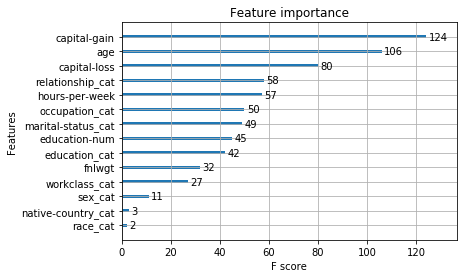

In [32]:
fig = plt.figure(figsize=(10, 10))
xgb.plot_importance(xgbClf)
plt.show()

In [33]:
accuracy_score(xgbClf.predict(X_train), y_train)

0.86986018794407516

In [34]:
accuracy_score(xgbClf.predict(X_test), y_test)

0.85911036664805507

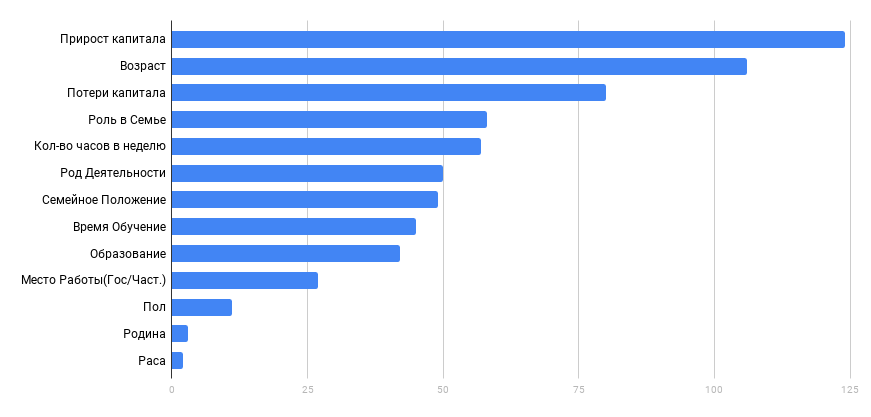

In [1]:
from IPython.display import Image
Image(filename='../data/chart.png')